In [100]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from datetime import datetime

mpl.rcParams['figure.figsize'] = (12, 10)
mpl.rcParams['axes.grid'] = False

In [101]:
datasetName = 'synthetic'
dataset = pd.read_csv(f"./datasets/final/final-formed-{datasetName}.csv", delimiter=',', date_format='%Y-%m-%d %H:%M:%S', parse_dates=['Timestamp'])

date_time = pd.to_datetime(dataset['Timestamp'], format='%Y-%m-%d %H:%M:%S')

dataset.drop('Timestamp', axis=1, inplace=True)

if datasetName in ['auvergrid', 'sharcnet']:
    dataset.drop(['cosMonth', 'sinMonth'], axis=1, inplace=True)

In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CPUTime        35041 non-null  float64
 1   Memory         35041 non-null  float64
 2   NJobs          35041 non-null  float64
 3   NProcs         35041 non-null  float64
 4   ArrivedJobs    35041 non-null  int64  
 5   CompletedJobs  35041 non-null  int64  
 6   cosHour        35041 non-null  float64
 7   sinHour        35041 non-null  float64
 8   cosDay         35041 non-null  float64
 9   sinDay         35041 non-null  float64
 10  cosMonth       35041 non-null  float64
 11  sinMonth       35041 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 3.2 MB


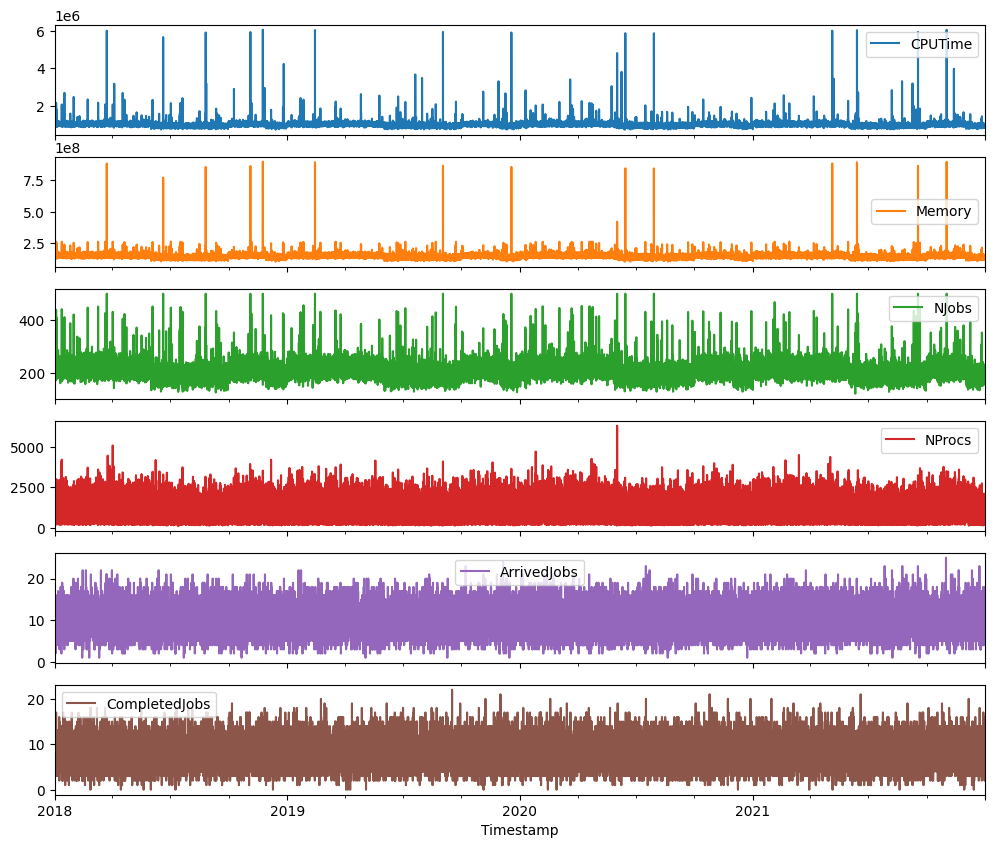

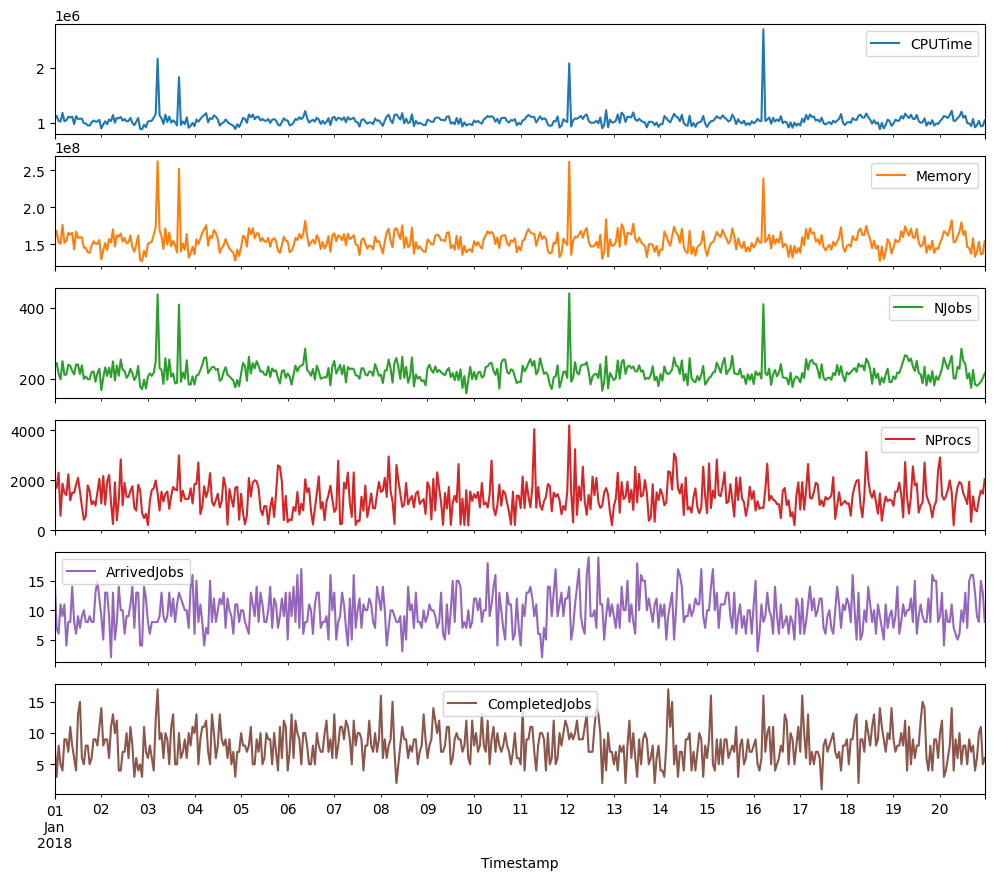

In [103]:
plot_cols = ['CPUTime', 'Memory', 'NJobs', 'NProcs', 'ArrivedJobs', 'CompletedJobs']
plot_features = dataset[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = dataset[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [104]:
column_indices = {name: i for i, name in enumerate(dataset.columns)}

n = len(dataset)
train_df = dataset[int(n*0):int(n*0.8)]
test_df = dataset[int(n*0.8):int(n*1.0)]

num_features = dataset.shape[1]

In [105]:
train_df.head()

,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs,cosHour,sinHour,cosDay,sinDay,cosMonth,sinMonth
0,1.060517e+06,1.574963e+08,237.883862,1663.992864,15,8,1.000000,0.000000,0.999852,0.017213,0.866025,0.5
1,1.125058e+06,1.679650e+08,245.436361,1704.237100,7,3,0.965926,0.258819,0.999852,0.017213,0.866025,0.5
2,1.031287e+06,1.526615e+08,215.937920,2302.502089,6,8,0.866025,0.500000,0.999852,0.017213,0.866025,0.5
3,1.019123e+06,1.506224e+08,198.998278,579.824822,11,5,0.707107,0.707107,0.999852,0.017213,0.866025,0.5
4,1.178008e+06,1.763897e+08,250.351872,1862.300267,9,4,0.500000,0.866025,0.999852,0.017213,0.866025,0.5


In [106]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CPUTime,28032.0,1.007355e+06,1.470365e+05,7.341930e+05,9.470130e+05,1.001539e+06,1.055657e+06,6.062456e+06
Memory,28032.0,1.481562e+08,1.994908e+07,1.025664e+08,1.385562e+08,1.477072e+08,1.566937e+08,8.979081e+08
NJobs,28032.0,2.079722e+02,2.941241e+01,1.247451e+02,1.893783e+02,2.069877e+02,2.247641e+02,5.000000e+02
NProcs,28032.0,1.265580e+03,6.327910e+02,1.310698e+02,8.047622e+02,1.230297e+03,1.673011e+03,6.284498e+03
ArrivedJobs,28032.0,1.000139e+01,3.139776e+00,1.000000e+00,8.000000e+00,1.000000e+01,1.200000e+01,2.400000e+01
CompletedJobs,28032.0,8.033283e+00,2.836085e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,2.200000e+01
cosHour,28032.0,-5.322987e-17,7.071194e-01,-1.000000e+00,-7.071068e-01,-6.123234e-17,7.071068e-01,1.000000e+00
sinHour,28032.0,-1.368768e-17,7.071194e-01,-1.000000e+00,-7.071068e-01,6.123234e-17,7.071068e-01,1.000000e+00
cosDay,28032.0,4.759617e-02,7.109482e-01,-9.999630e-01,-6.712600e-01,1.073813e-01,7.498264e-01,1.000000e+00
sinDay,28032.0,3.397343e-02,7.008342e-01,-9.999907e-01,-6.680639e-01,8.596480e-02,7.236440e-01,9.999907e-01


In [107]:
train_mean = train_df.mean()
train_std = train_df.std()

def scale(data, column):
    return (data - train_mean[column]) / train_std[column]

def descale(data, column):
    return (data * train_std[column]) + train_mean[column]

# train_df = scale(train_df, train_df.columns)

In [108]:
train_df.head()

,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs,cosHour,sinHour,cosDay,sinDay,cosMonth,sinMonth
0,1.060517e+06,1.574963e+08,237.883862,1663.992864,15,8,1.000000,0.000000,0.999852,0.017213,0.866025,0.5
1,1.125058e+06,1.679650e+08,245.436361,1704.237100,7,3,0.965926,0.258819,0.999852,0.017213,0.866025,0.5
2,1.031287e+06,1.526615e+08,215.937920,2302.502089,6,8,0.866025,0.500000,0.999852,0.017213,0.866025,0.5
3,1.019123e+06,1.506224e+08,198.998278,579.824822,11,5,0.707107,0.707107,0.999852,0.017213,0.866025,0.5
4,1.178008e+06,1.763897e+08,250.351872,1862.300267,9,4,0.500000,0.866025,0.999852,0.017213,0.866025,0.5


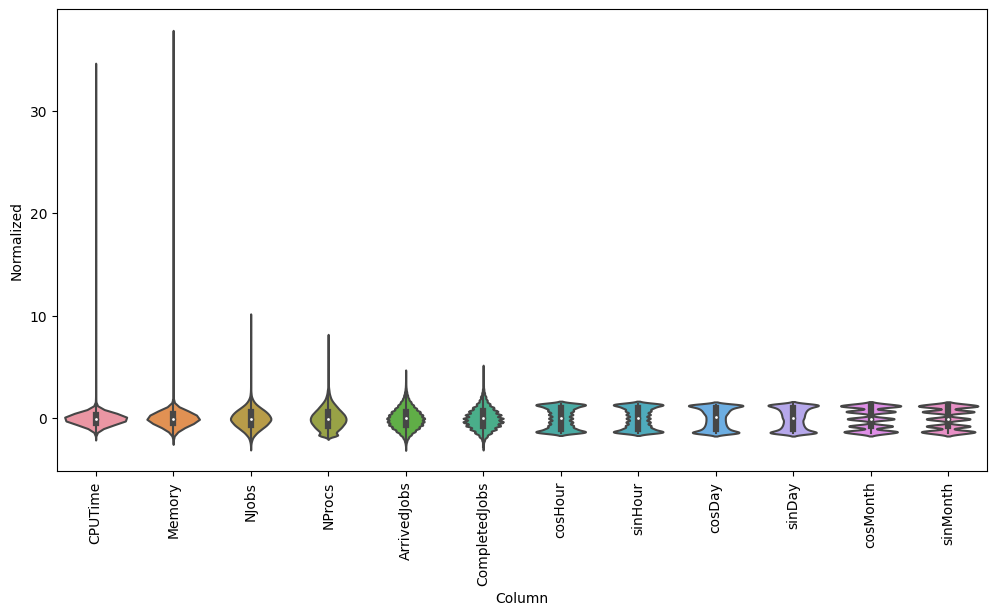

In [109]:
train_df = scale(train_df, train_df.columns)
df_std = train_df.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(dataset.keys(), rotation=90)
train_df = descale(train_df, train_df.columns)

## Data windowing

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data. 

The main features of the input windows are:

- The width (number of time steps) of the input and label windows.
- The time offset between them.
- Which features are used as inputs, labels, or both. 


### 1. Indexes and offsets

Start by creating the `WindowGenerator` class. The `__init__` method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to `tf.data.Dataset`s of windows later.

In [110]:
import numpy as np

class WindowGenerator():
    def __init__(self, input_width, label_width, shift, label_columns, train_df = train_df, test_df = test_df):
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        self.total_window_size = input_width + shift
        self.label_columns = label_columns

        self.train_df = train_df
        self.test_df = test_df

        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}


In [111]:
def split_window(self, features):
    inputs = features[:, :self.input_width]
    labels = features[:, self.input_width:]
    if self.label_columns is not None:
        labels = labels[:, [self.label_columns_indices[label] for label in self.label_columns]]
    return inputs, labels

WindowGenerator.split_window = split_window

In [112]:
def make_dataset(self, data):
    features = np.array(data, dtype=np.float32)
    labels = np.array(data.iloc[:, [self.column_indices[column] for column in self.label_columns]], dtype=np.float32)
    ds_features = []
    ds_labels = []
    for i in range(len(data) - self.total_window_size + 1):
        ds_features.append(features[i:i+self.input_width][0])
        ds_labels.append(labels[i+self.input_width:i+self.total_window_size][0])
    ds_features = np.array(ds_features)
    ds_labels = np.array(ds_labels)

    return ds_features, ds_labels

WindowGenerator.make_dataset = make_dataset

In [113]:
@property
def train(self):
    inputs, labels = self.make_dataset(self.train_df)
    return inputs, labels

@property
def test(self):
    inputs, labels = self.make_dataset(self.test_df)
    return inputs, labels

@property
def example(self):
    return self.train  # Return the training dataset for plotting

WindowGenerator.train = train
WindowGenerator.test = test
WindowGenerator.example = example


In [114]:
me_performance = {}
mae_performance = {}

In [115]:
labels = 'CPUTime'

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=[labels])


x_train, y_train = window.train
x_test, y_test = window.test

# Create and fit the regression model
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

# Make predictions using the regression model
y_pred = regression_model.predict(x_test)

# y_pred = descale(y_pred, labels)
# y_test = descale(y_test, labels)

me = np.sum(y_test - y_pred) / (len(y_test)*np.mean(y_test))
normalised_me = me / np.mean(y_test)

mae = mean_absolute_error(y_test, y_pred)
normalised_MAE = mae / np.mean(y_test)

me_performance["Linear Regression"] = normalised_me*100
mae_performance["Linear Regression"] = normalised_MAE*100

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=[labels])

x_train, y_train = window.train
x_test, y_test = window.test

try:
    print("Loading Lasso Grid...")
    lasso_grid = joblib.load( 'pkl/lasso_grid_synth.pkl')
except:
    print("Lasso Grid not found. Creating...")
    lasso = Lasso()
    lasso_params = {'alpha': [5000000, 7500000, 1000000, 1500000], 'max_iter': [10000000]} 
    lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
    lasso_grid.fit(x_train, y_train)

try:
    print("Loading Ridge Grid...")
    ridge_grid = joblib.load( 'pkl/ridge_grid_synth.pkl')
except:
    print("Ridge Grid not found. Creating...")
    ridge = Ridge()
    ridge_params = {'alpha': [1e-17, 1e-10, 1e-8, 1e-9, 1e-11, 1e-12], 'max_iter': [10000000]}
    ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
    ridge_grid.fit(x_train, y_train)
# Tune for models using GridSearchCV

try:
    print("Loading Elastic Grid...")
    elastic_grid = joblib.load('pkl/elastic_grid_synth.pkl')
except:
    print("Elastic Grid not found. Creating...")
    elastic = ElasticNet()
    elastic_params = {'alpha': [75, 100, 125, 150, 175, 200, 225, 250], 'max_iter': [10000000]}
    elastic_grid = GridSearchCV(elastic, elastic_params, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
    elastic_grid.fit(x_train, y_train)

joblib.dump(lasso_grid, 'pkl/lasso_grid_synth.pkl')
joblib.dump(ridge_grid, 'pkl/ridge_grid_synth.pkl')
joblib.dump(elastic_grid, 'pkl/elastic_grid_synth.pkl')

# Make predictions using the tuned models
y_pred_lasso = lasso_grid.predict(x_test)
y_pred_ridge = ridge_grid.predict(x_test)
y_pred_elastic = elastic_grid.predict(x_test)

me_lasso = np.sum(y_test - y_pred_lasso) / (len(y_test)*np.mean(y_test))
me_ridge = np.sum(y_test - y_pred_ridge) / (len(y_test)*np.mean(y_test))
me_elastic = np.sum(y_test - y_pred_elastic) / (len(y_test)*np.mean(y_test))

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)

normalised_ME_lasso = me_lasso / np.mean(y_test)
normalised_ME_ridge = me_ridge / np.mean(y_test)
normalised_ME_elastic = me_elastic / np.mean(y_test)

normalised_MAE_lasso = mae_lasso / np.mean(y_test)
normalised_MAE_ridge = mae_ridge / np.mean(y_test)
normalised_MAE_elastic = mae_elastic / np.mean(y_test)

me_performance["Lasso"] = normalised_ME_lasso*100
me_performance["Ridge"] = normalised_ME_ridge*100
me_performance["Elastic Net"] = normalised_ME_elastic*100

mae_performance["Lasso"] = normalised_MAE_lasso*100
mae_performance["Ridge"] = normalised_MAE_ridge*100
mae_performance["Elastic Net"] = normalised_MAE_elastic*100

mae_performance


Loading Lasso Grid...
Lasso Grid not found. Creating...


Loading Ridge Grid...
Ridge Grid not found. Creating...


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.32788e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.09379e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.24288e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.20255e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:21

Loading Elastic Grid...
Elastic Grid not found. Creating...


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.174e+14, tolerance: 4.636e+10
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.028e+14, tolerance: 4.344e+10
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.391e+14, toleranc

{'Linear Regression': 6.3820429146289825,
 'Lasso': 6.555098295211792,
 'Ridge': 5.692490935325623,
 'Elastic Net': 6.369917094707489}

In [118]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=[labels])

x_train, y_train = window.train
x_test, y_test = window.test

try:
    print("Loading Polynomial Grid...")
    poly_grid = joblib.load('pkl/poly_grid_synth.pkl')
except:
    poly = PolynomialFeatures()
    linear = LinearRegression()
    pipe = Pipeline([('poly', poly), ('linear', linear)])
    params = {'poly__degree': [1, 2, 3]}
    poly_grid = GridSearchCV(pipe, params, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
    poly_grid.fit(x_train, y_train)

joblib.dump(poly_grid, 'pkl/poly_grid_synth.pkl')

y_pred_poly = poly_grid.predict(x_test)

me_poly = np.sum(y_test - y_pred_poly) / (len(y_test)*np.mean(y_test))
mae_poly = mean_absolute_error(y_test, y_pred_poly)

normalised_ME_poly = me_poly / np.mean(y_test)
normalised_MAE_poly = mae_poly / np.mean(y_test)

me_performance["Polynomial Regression"] = normalised_ME_poly*100
mae_performance["Polynomial Regression"] = normalised_MAE_poly*100

mae_performance 


Loading Polynomial Grid...


{'Linear Regression': 6.3820429146289825,
 'Lasso': 6.555098295211792,
 'Ridge': 5.692490935325623,
 'Elastic Net': 6.369917094707489,
 'Polynomial Regression': 6.331419199705124}

In [119]:
poly_grid.best_params_

{'poly__degree': 2}

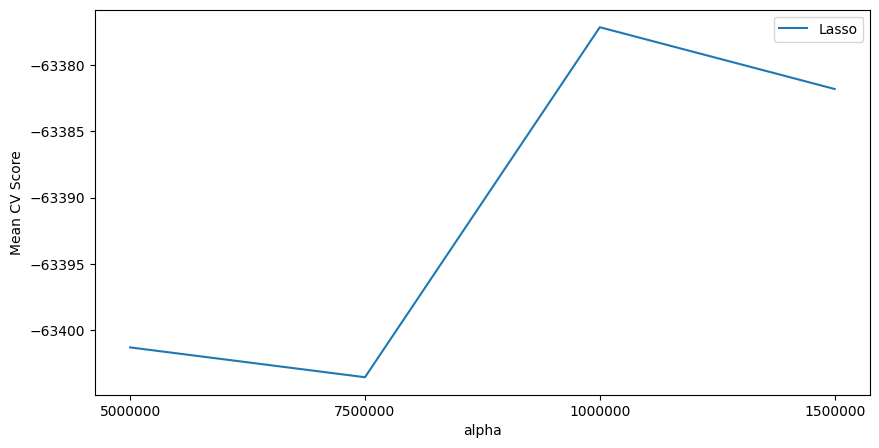

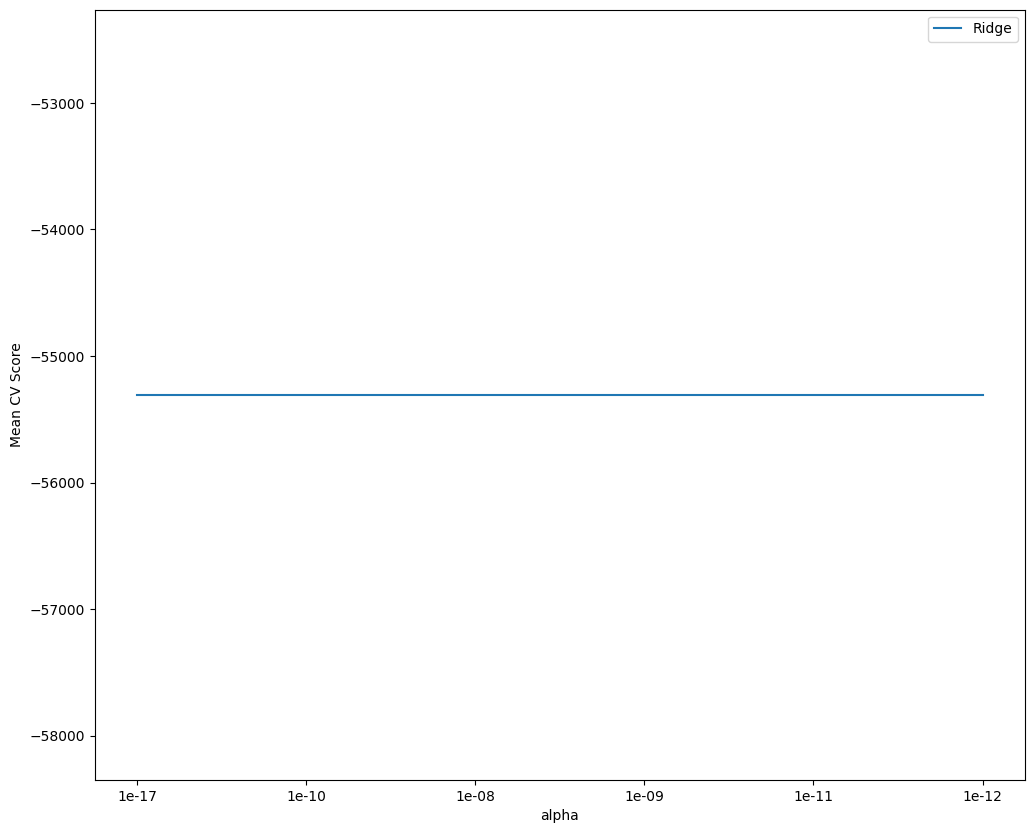

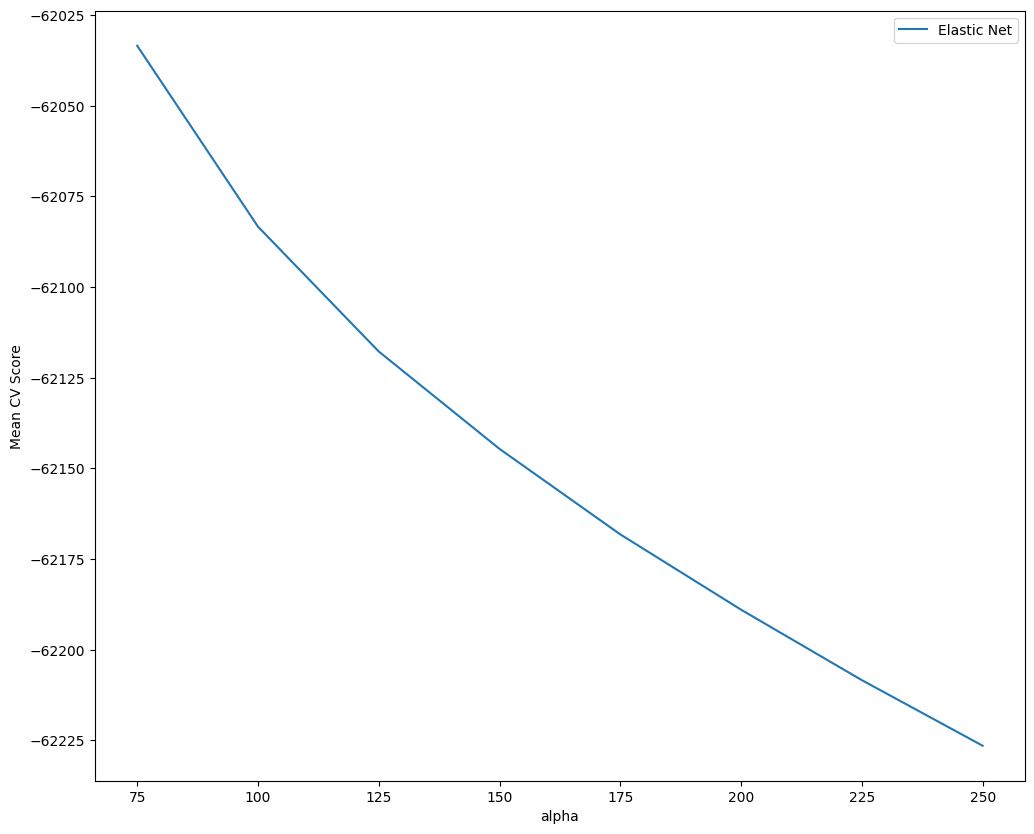

In [120]:
#plot grid search result MAE

lasso_alpha = [str(i) for i in lasso_grid.cv_results_['param_alpha']]
ridge_alpha = [str(i) for i in ridge_grid.cv_results_['param_alpha']]
elastic_alpha = [str(i) for i in elastic_grid.cv_results_['param_alpha']]

plt.figure(figsize=(10, 5))
plt.plot(lasso_alpha, lasso_grid.cv_results_['mean_test_score'], label='Lasso')
plt.xlabel('alpha')
plt.ylabel('Mean CV Score')
plt.legend()
plt.show()

plt.plot(ridge_alpha, ridge_grid.cv_results_['mean_test_score'], label='Ridge')
plt.xlabel('alpha')
plt.ylabel('Mean CV Score')
plt.legend()
plt.show()

plt.plot(elastic_alpha, elastic_grid.cv_results_['mean_test_score'], label='Elastic Net')
plt.xlabel('alpha')
plt.ylabel('Mean CV Score')
plt.legend()
plt.show()



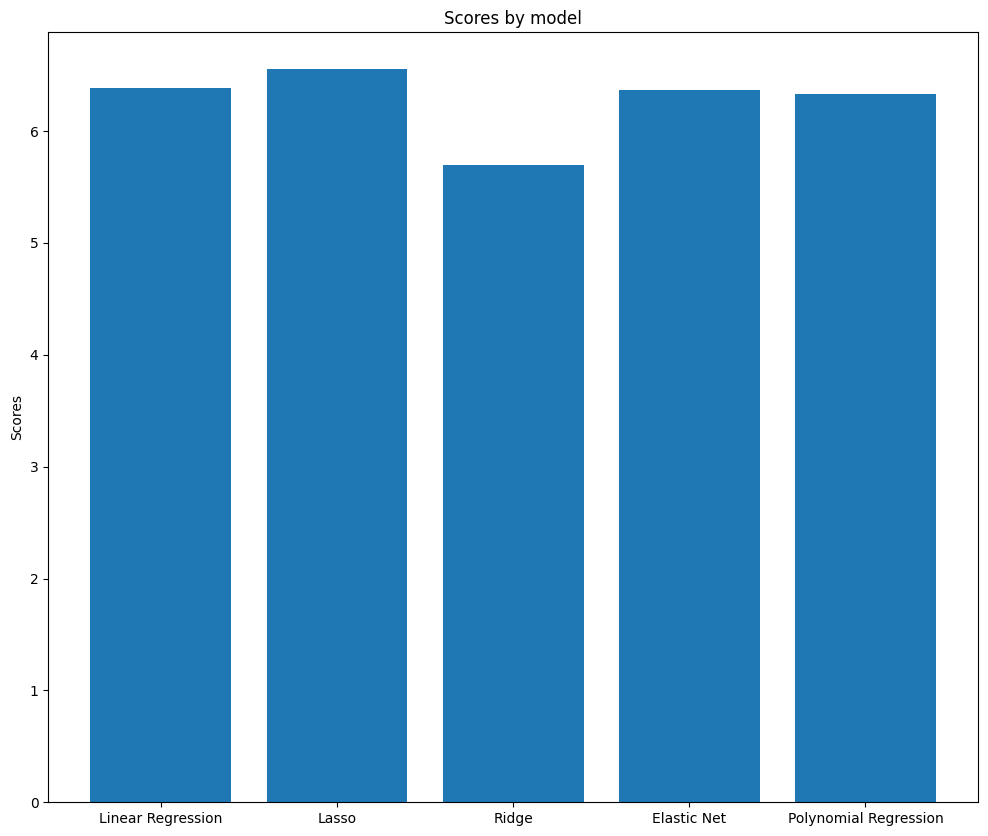

In [121]:
x = np.arange(len(me_performance))
fig, ax = plt.subplots()
rects1 = ax.bar(x, mae_performance.values(), label='MAE')
ax.set_ylabel('Scores')
ax.set_title('Scores by model')
ax.set_xticks(x, list(me_performance.keys()))
plt.show()

In [122]:
me_performance

{'Linear Regression': -6.791238119237833e-07,
 'Lasso': -0.00588162634825198,
 'Ridge': 2.3766012673790638e-08,
 'Elastic Net': -0.00477045494947721,
 'Polynomial Regression': -6.90581642845578e-07}

<BarContainer object of 12 artists>

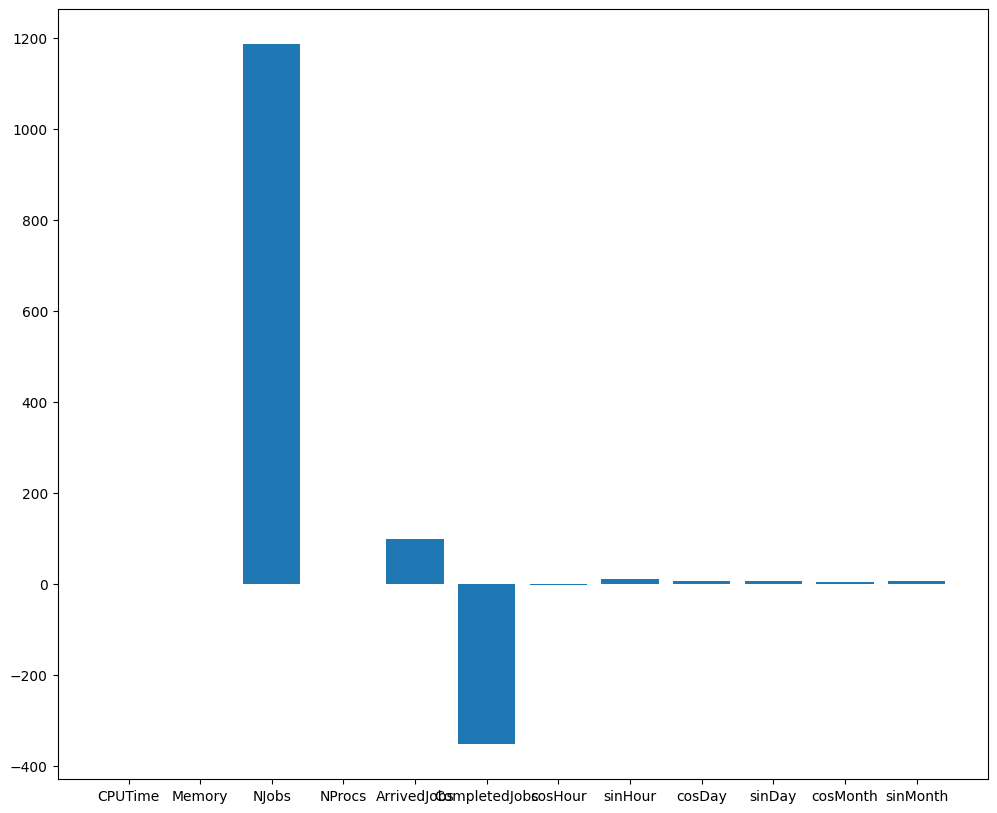

In [123]:
plt.bar(train_df.columns, regression_model.coef_[0])

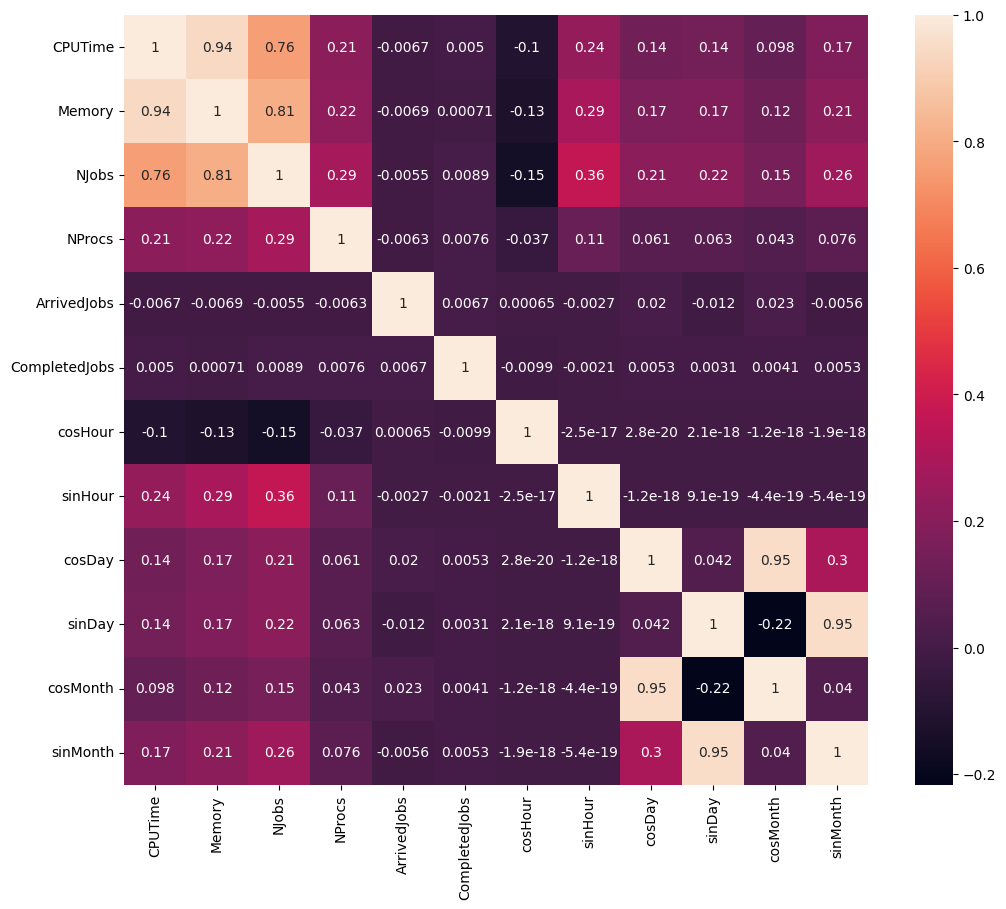

In [126]:
#correlation matrix for dataset
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
